# 精准率和召回率本身就是矛盾的
![b1](img/b1.png)
![b2](img/b2.png)

In [1]:
# 注意上面这个是基于不同的score做分割时的精准率和召回率的变化.

In [2]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy() # 不修改原有数据
y[digits.target==9]=1
y[digits.target!=9]=0
# 10个类别的分类问题 转换为了二分类问题 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
from sklearn.metrics import f1_score

In [4]:
y_predict = log_reg.predict(X_test)

In [5]:
f1_score(y_test, y_predict)

0.8674698795180723

In [6]:
from sklearn.metrics import precision_score

In [7]:
from sklearn.metrics import recall_score

In [8]:
# 调整分类的阈值

In [10]:
raw_scores=log_reg.decision_function(X_test)

In [12]:
raw_scores[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

In [13]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
np.min(raw_scores)

-85.68608522646575

In [15]:
np.max(raw_scores)

19.8895858799022

In [16]:
# 用新的threashold而不是0 用5
y_predict5 = np.array(raw_scores >= 5, dtype="int")

In [17]:
f1_score(y_test, y_predict5)

0.6857142857142858

In [18]:
precision_score(y_test, y_predict5)

0.96

In [19]:
recall_score(y_test, y_predict5)

0.5333333333333333

In [32]:
# 画出来他们的图.
#　比如从-20,20 来看他们的变化.
recalls = []
precisions = []
f1s =[]
thresholds = np.linspace(np.min(raw_scores), np.max(raw_scores), 100)
for i in thresholds:
    y_p = np.array(raw_scores>=i, dtype="int")
    recalls.append(recall_score(y_test, y_p))
    precisions.append(precision_score(y_test, y_p))
    f1s.append(f1_score(y_test, y_p))

In [22]:
import matplotlib.pyplot as plt

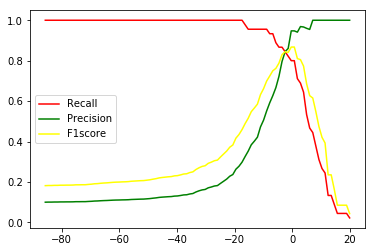

In [33]:
plt.plot(thresholds, np.array(recalls), label="Recall", color="red")
plt.plot(thresholds, np.array(precisions), label="Precision", color="green")
plt.plot(thresholds, np.array(f1s), label="F1score", color="yellow")
plt.legend()

In [35]:
recalls = []
precisions = []
f1s =[]
thresholds = np.linspace(-20, 20, 100)
for i in thresholds:
    y_p = np.array(raw_scores>=i, dtype="int")
    recalls.append(recall_score(y_test, y_p))
    precisions.append(precision_score(y_test, y_p))
    f1s.append(f1_score(y_test, y_p))

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


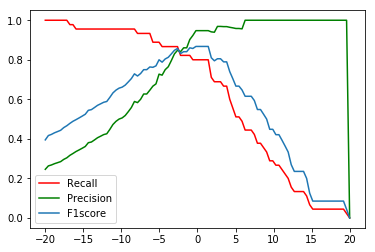

In [37]:
plt.plot(thresholds, np.array(recalls), label="Recall", color="red")
plt.plot(thresholds, np.array(precisions), label="Precision", color="green")
plt.plot(thresholds, np.array(f1s), label="F1score")
plt.legend()

# Precision_recall曲线

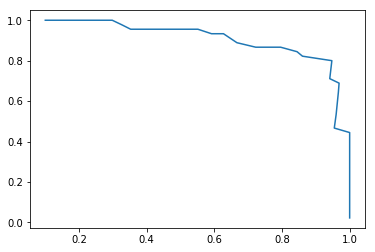

In [41]:
# 画出来他们的图.
recalls = []
precisions = []
f1s =[]
thresholds = np.linspace(np.min(raw_scores), np.max(raw_scores), 100)
for i in thresholds:
    y_p = np.array(raw_scores>=i, dtype="int")
    recalls.append(recall_score(y_test, y_p))
    precisions.append(precision_score(y_test, y_p))
    f1s.append(f1_score(y_test, y_p))
plt.plot(precisions, recalls)

# sklearn中的曲线

In [43]:
from sklearn.metrics import precision_recall_curve

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_test, raw_scores)

In [45]:
precisions.shape

(145,)

In [46]:
recalls.shape

(145,)

In [47]:
thresholds.shape

(144,)

In [48]:
# The last precision and recall values are 1. and 0. 
# respectively and do not have a corresponding threshold. This ensures that the graph starts on the x axis.
# sklearn doc

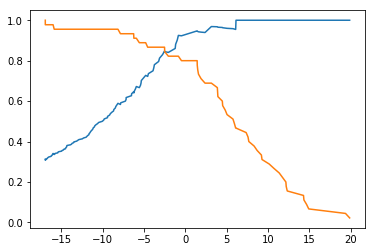

In [49]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

![pr1](img/pr1.png)